24360
29675
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      7308
           1       0.66      0.71      0.69      8903

    accuracy                           0.64     16211
   macro avg       0.64      0.63      0.63     16211
weighted avg       0.64      0.64      0.64     16211

[[4029 3279]
 [2541 6362]]


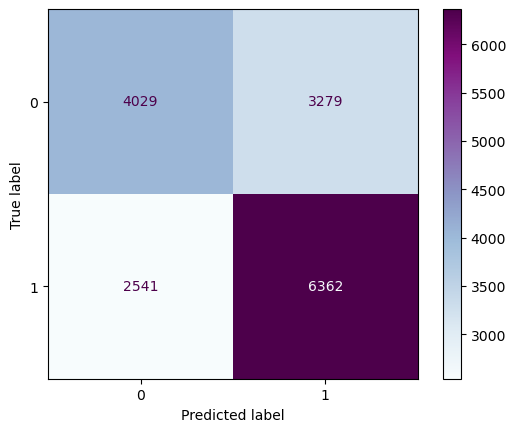

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
mushrooom_data = pd.read_csv("data/mushroom_cleaned.csv")
y = mushrooom_data['class'] # Target variable
x = mushrooom_data.iloc[:,:-1]
# sns.heatmap(x.corr(), annot=True)

stratified_shuffle_split  = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=142)

index_training_data, index_test_data = next(stratified_shuffle_split.split(x, y))

x_train_set = mushrooom_data.loc[index_training_data, x.columns]
y_train_ = mushrooom_data.loc[index_training_data, "class"]

x_test_set = mushrooom_data.loc[index_test_data, x.columns]
y_test_ = mushrooom_data.loc[index_test_data, "class"]

model = LogisticRegressionCV(Cs=10,cv=3,penalty='l1',solver='liblinear',random_state=142)
print((y ==0).sum())
print((y ==1).sum())
model.fit(x_train_set,y_train_)

predict = model.predict(x_test_set)

print(classification_report(y_test_, predict))
conf_matrix = confusion_matrix(y_test_, predict)
print(conf_matrix)
# sns.heatmap(conf_matrix, annot=True)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)
display.plot(cmap='BuPu')
plt.show()